# Partial Dependence Plots

While feature importance shows **what** variables most affect predictions, partial dependence plots show **how** a feature affects predictions.

This is useful to answer questions like: *Controlling for all other house features, what impact do longitude and latitude have on home prices?*

In [1]:
!pip install pdpbox

     |████████████████████████████████| 57.7MB 81kB/s 
  Created wheel for pdpbox: filename=PDPbox-0.2.0-cp36-none-any.whl size=57690724 sha256=eb51bc8d800028ae2fef095b81bc91f31c438131fe1d64a197817ad4213e3aaf
  Stored in directory: /root/.cache/pip/wheels/7d/08/51/63fd122b04a2c87d780464eeffb94867c75bd96a64d500a3fe
Successfully built pdpbox


In [3]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier

data = pd.read_csv('https://raw.githubusercontent.com/DataScienceUB/ExplainableDataScience/master/FIFA%202018%20Statistics.csv')
y = (data['Man of the Match'] == "Yes")  # Convert from string "Yes"/"No" to binary
feature_names = [i for i in data.columns if data[i].dtype in [np.int64]]
X = data[feature_names]
train_X, val_X, train_y, val_y = train_test_split(X, y, random_state=1)
tree_model = DecisionTreeClassifier(random_state=0, max_depth=5, min_samples_split=5).fit(train_X, train_y)

findfont: Font family ['Arial'] not found. Falling back to DejaVu Sans.
findfont: Font family ['Arial'] not found. Falling back to DejaVu Sans.
findfont: Font family ['Arial'] not found. Falling back to DejaVu Sans.
findfont: Font family ['Arial'] not found. Falling back to DejaVu Sans.


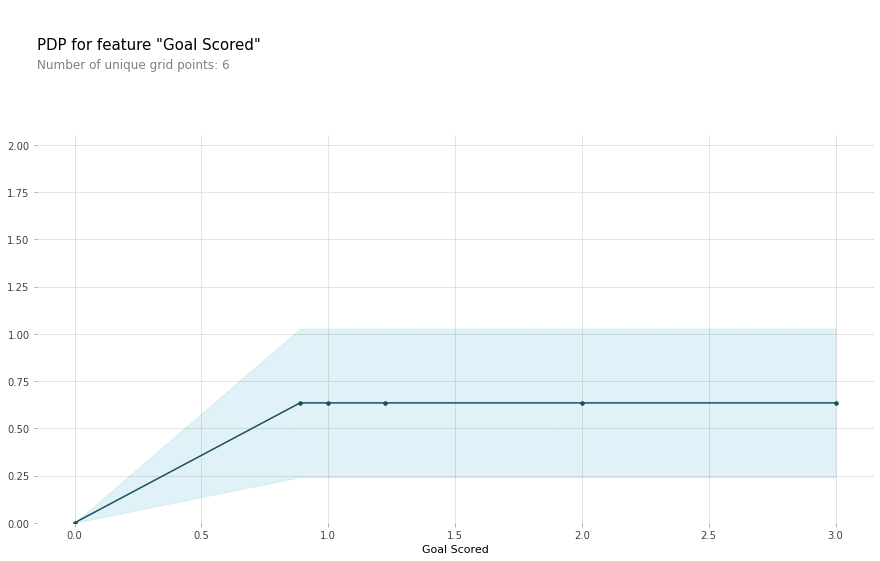

In [4]:
%matplotlib inline
from matplotlib import pyplot as plt
from pdpbox import pdp, get_dataset, info_plots

# Create the data that we will plot
pdp_goals = pdp.pdp_isolate(model=tree_model, 
                            dataset=val_X, 
                            model_features=feature_names, 
                            feature='Goal Scored')

# plot it
pdp.pdp_plot(pdp_goals, 'Goal Scored')
plt.show()

The `y` axis is interpreted as change in the prediction from what it would be predicted at the baseline or leftmost value.

A blue shaded area indicates level of confidence

From this particular graph, the explanation we can produce is: **Scoring a goal substantially increases your chances of winning "Player of The Game." But extra goals beyond that appear to have little impact on predictions.**

Here is another example plot:

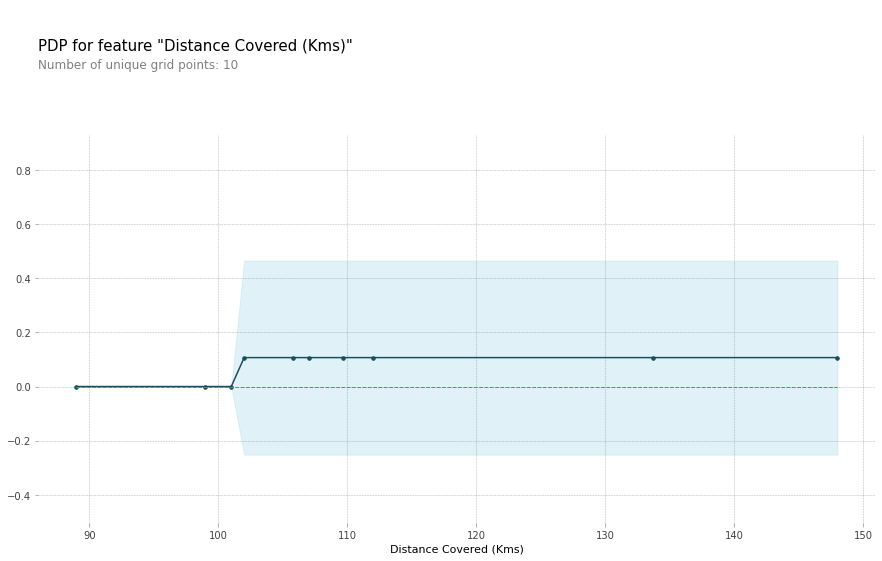

In [5]:
feature_to_plot = 'Distance Covered (Kms)'
pdp_dist = pdp.pdp_isolate(model=tree_model, dataset=val_X, model_features=feature_names, feature=feature_to_plot)

pdp.pdp_plot(pdp_dist, feature_to_plot)
plt.show()

**Question**: What is the explanation you can produce from this graph?

> Indented block



*Your answer here*

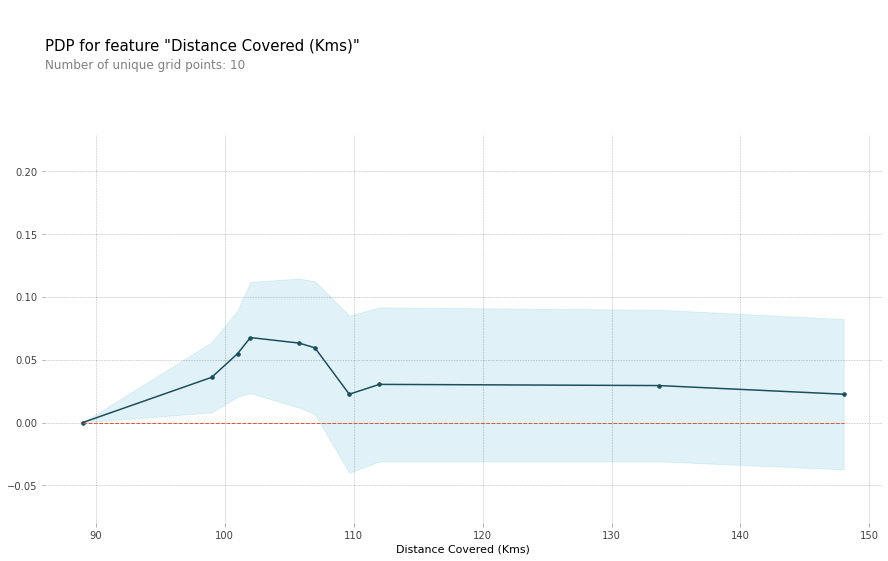

In [6]:
# Build Random Forest model
rf_model = RandomForestClassifier(random_state=0).fit(train_X, train_y)

pdp_dist = pdp.pdp_isolate(model=rf_model, dataset=val_X, model_features=feature_names, feature=feature_to_plot)

pdp.pdp_plot(pdp_dist, feature_to_plot)
plt.show()

**Question**: What is the explanation you can produce from this graph?
